# Plots of CCLM domains

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp
import numpy as np

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'


manager = vp.InputManager(machine=machine)



In [2]:
years_to_analyse = range(1980,1985)

#ds_obs = ds_obs.sel(time = ds_obs.time.dt.year.isin(1995))

In [3]:
# load CPM simulation to extract domain rlat and rlons

ds_mod_cpm = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])

def extract_border_rlatlon(ds_belgium):
    # Extract the rlat/rlon of the outermost rows and columns (the border of the Belgian domain)
    rlat_border = xr.concat([ds_belgium['rlat'].isel(rlat=0),
                             ds_belgium['rlat'].isel(rlat=-1)], dim='points')

    rlon_border = xr.concat([ds_belgium['rlon'].isel(rlon=0), 
                             ds_belgium['rlon'].isel(rlon=-1),], dim='points')

    return rlat_border.values, rlon_border.values

rlat_border, rlon_border = extract_border_rlatlon(ds_mod_cpm.isel(time=1))


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [4]:
variables = ['ta850','ta700','ta500','ta250']
pressure_levels = [850,700,500,250]


experiment = 'CB2_CCLM_EUR11_ERA5_evaluation_urb'
variable = variables[0]
model = "CCLM"
ds_eur11 = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "mean"])


da_eur11 = ds_eur11[variable].mean('time')



File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T850p/daily/T850p_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['ta850']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


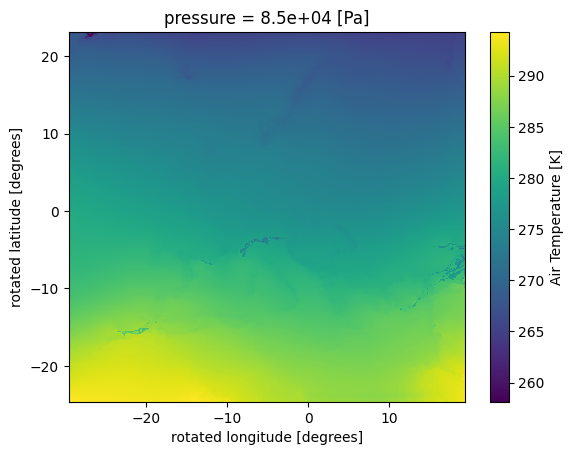

In [5]:
da_eur11.plot()

In [38]:
# from the EUR11 simulaiton, extract the borders 

europe_subset = da_eur11.sel(rlat=slice(rlat_border[0], rlat_border[1]), 
                              rlon=slice(rlon_border[0], rlon_border[1]))

bottom =  europe_subset.isel(rlat=0).squeeze().values
top =  europe_subset.isel(rlat=-1).squeeze().values
left = europe_subset.isel(rlon=0).squeeze().values
right = europe_subset.isel(rlon=-1).squeeze().values

# merge all into one 1D array
border_values = np.concat([np.array([bottom, top]).ravel(),np.array([left,right]).ravel()])
border_values_mean = np.mean(border_values)